# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

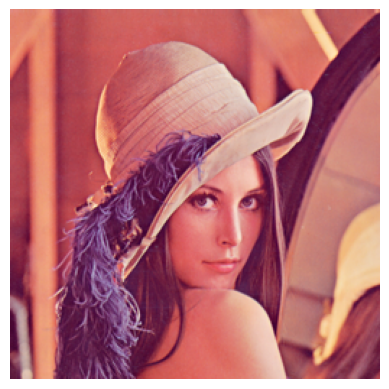

In [2]:
lena_rgb = cv2.imread('lenaRGB.png')
lena_rgb = cv2.cvtColor(lena_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb)
plt.axis('off')

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

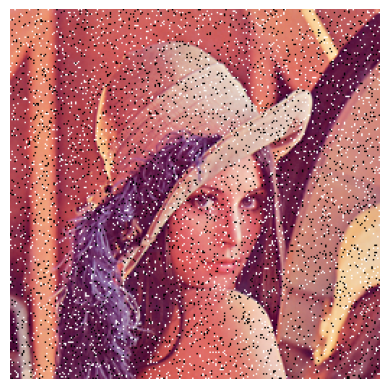

In [3]:
lena_rgb_szum = cv2.imread('lenaRGBSzum.png')
lena_rgb_szum = cv2.cvtColor(lena_rgb_szum, cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb_szum)
plt.axis('off')

In [4]:
def median_window(window):
    width, height, _ = window.shape

    distances = np.zeros((width, height))

    for y in range(height):
        for x in range(width):
            distances[y, x] = np.sqrt(np.square(window.astype(np.int32) - window[y, x].astype(np.int32)).sum(axis=2)).sum()

    index = np.unravel_index(np.argmin(distances), distances.shape)
    return window[index]  

def median_filter_rgb(img, size):
    
    img_filtered = img.copy()

    img = np.pad(img, ((size // 2, size // 2), (size // 2, size // 2), (0, 0)), mode='constant')
    width, height, _ = img.shape
    size_s = size // 2
    size_e = size - size_s

    for y in range(size_s, height - size_e):
        for x in range(size_s, width - size_e):
            window = img[y - size_s:y + size_e, x - size_s:x + size_e]
            
            img_filtered[y - size_s, x - size_s] = median_window(window)

    return img_filtered

In [5]:
def plot_filter(img, size):
    img_filtered = median_filter_rgb(img, size)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 15))
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title('Original')

    axs[1].imshow(img_filtered)
    axs[1].axis('off')
    axs[1].set_title('Filtered')

    plt.show()

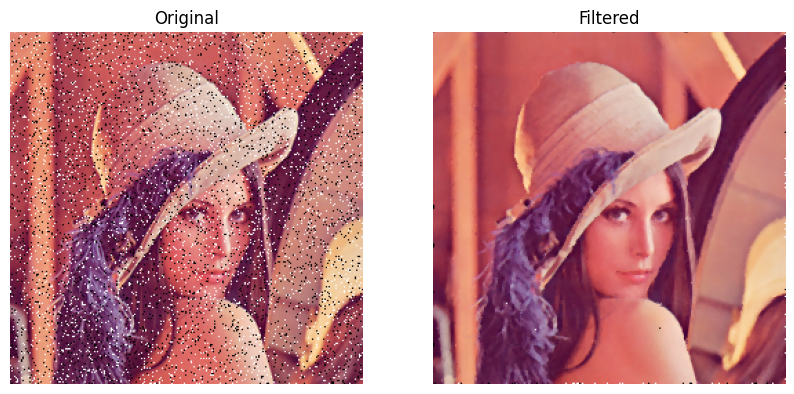

In [6]:
plot_filter(lena_rgb_szum, 3)

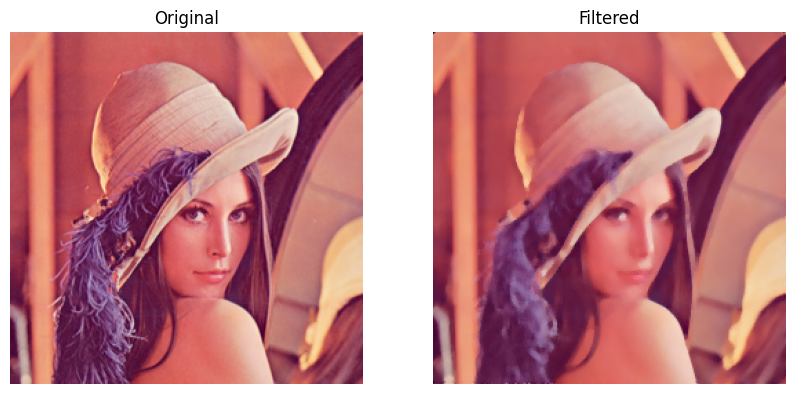

In [7]:
plot_filter(lena_rgb, 5)